In [14]:
import tensorflow as tf #modelling
import pandas as pd #reading and processing data
import seaborn as sns #visualization
from tensorflow.keras.layers import Normalization, Dense, InputLayer

# Data prepration

In [3]:
data = pd.read_csv('train.csv')
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
data.shape

(1000, 12)

In [5]:
# sns.pairplot(data[["years", "km", "rating", "condition", "economy", "top speed", "hp", "torque", "current price"]], diag_kind='kde')

In [6]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data , tf.float32)
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, 3.000000e+00,
        7.894500e+04, 1.000000e+00, 2.000000e+00, 1.400000e+01,
        1.770000e+02, 7.300000e+01, 1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, 6.000000e+00,
        1.172200e+05, 5.000000e+00, 9.000000e+00, 9.000000e+00,
        1.480000e+02, 7.400000e+01, 9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, 2.000000e+00,
        1.325380e+05, 2.000000e+00, 8.000000e+00, 1.500000e+01,
        1.810000e+02, 5.300000e+01, 9.700000e+01, 2.153860e+05],
       [4.000000e+00, 5.739990e+05, 7.223810e+05, 4.000000e+00,
        1.010650e+05, 4.000000e+00, 3.000000e+00, 1.100000e+01,
        1.970000e+02, 5.400000e+01, 1.160000e+02, 2.442955e+05],
       [5.000000e+00, 6.913880e+05, 8.113350e+05, 6.000000e+00,
        6.155900e+04, 3.000000e+00, 9.000000e+00, 1.200000e+01,
        1.600000e+02, 5.300000e+01, 1.050000e+02, 5

In [7]:
tensor_data = tf.random.shuffle(tensor_data)
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[8.370000e+02, 5.190910e+05, 8.434550e+05, 3.000000e+00,
        7.476200e+04, 2.000000e+00, 5.000000e+00, 1.000000e+01,
        1.380000e+02, 7.600000e+01, 7.300000e+01, 3.838755e+05],
       [4.300000e+02, 5.852970e+05, 8.151880e+05, 6.000000e+00,
        1.153790e+05, 5.000000e+00, 8.000000e+00, 1.400000e+01,
        1.610000e+02, 6.400000e+01, 1.190000e+02, 2.530550e+05],
       [8.360000e+02, 5.923830e+05, 8.269390e+05, 3.000000e+00,
        1.165690e+05, 4.000000e+00, 5.000000e+00, 1.000000e+01,
        1.890000e+02, 1.070000e+02, 1.170000e+02, 2.455945e+05],
       [7.300000e+01, 5.324100e+05, 8.038160e+05, 3.000000e+00,
        5.215600e+04, 4.000000e+00, 7.000000e+00, 1.300000e+01,
        1.430000e+02, 1.180000e+02, 9.000000e+01, 4.685430e+05],
       [2.010000e+02, 6.624540e+05, 8.226250e+05, 4.000000e+00,
        1.457960e+05, 4.000000e+00, 1.000000e+00, 1.300000e+01,
        1.760000e+02, 5.200000e+01, 1.200000e+02, 1

In [8]:
X = tensor_data[:, 3:-1] #taking all the rows and negelcting the first 3 columns and last column
X.shape

TensorShape([1000, 8])

In [9]:
y = tensor_data[:, -1] #taking last column only
y = tf.expand_dims(y, axis=-1) #expanding it to two dimensions so that the shape of input and output will be same
y.shape

TensorShape([1000, 1])

## Normalization
$$
\frac{x-mean}{std\; devaition}
$$

In [10]:
#Scaling our data
normalizer = Normalization()
normalizer.adapt(X)
normalizer(X)[:5]


<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.90849847, -0.8756355 , -0.7046622 , -0.20970327, -0.72888464,
        -1.4986984 , -0.41674215, -1.4453977 ],
       [ 0.83749485,  0.51841867,  1.4350005 ,  0.85298216,  1.065293  ,
        -0.3056739 , -1.0019174 ,  0.740064  ],
       [-0.90849847,  0.5592618 ,  0.72177964, -0.20970327, -0.72888464,
         1.1467037 ,  1.0949605 ,  0.64504397],
       [-0.90849847, -1.6515173 ,  0.72177964,  0.4987537 ,  0.6167485 ,
        -1.2393453 ,  1.631371  , -0.6377271 ],
       [-0.32650068,  1.5623891 ,  0.72177964, -1.6266172 ,  0.6167485 ,
         0.47238556, -1.5870925 ,  0.78757405]], dtype=float32)>

In [15]:
#using sequential api
model = tf.keras.Sequential([
    InputLayer(input_shape = (32,8)),
    normalizer,
    Dense(1)
]) # two layers , one is normalization layer, other is output layer

model.summary()
model.build()

/home/numaan/Documents/programming/ML/Machine-learning-course/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 32, 8)          │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32, 1)          │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26 (108.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 17 (72.00 B)

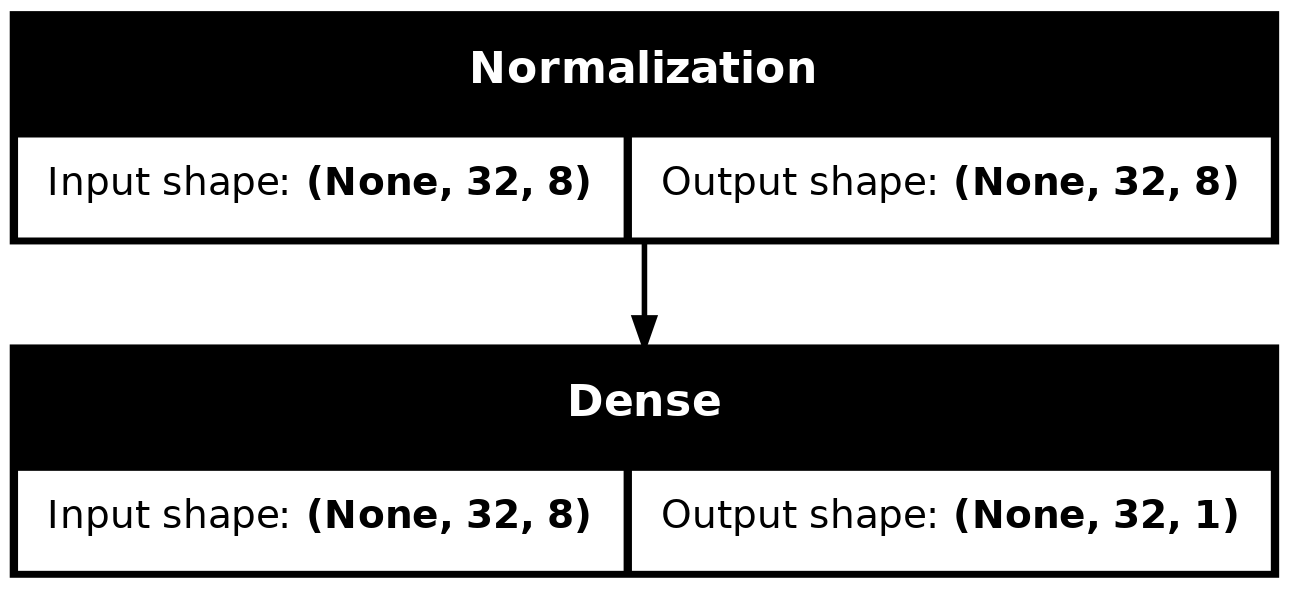

In [18]:
#if this gives error install graphicsvz in your system
#sudo apt-get install graphviz

tf.keras.utils.plot_model(model, to_file= 'model.png', show_shapes=True)